What are the peculiar velocities of the Iron TF galaxies?

In [2]:
import numpy as np

from scipy.stats import pearsonr

from astropy.table import Table
import astropy.constants as const

import pickle

import matplotlib.pyplot as plt

In [3]:
h = 0.7574 # From TF_iron-jointTFR-varyV0-perpdwarfs_H0.ipynb
H0 = 100*h

c = const.c.to('km/s')

# Data

SGA catalog with computed peculiar velocities

In [4]:
# SGA_TF = Table.read('SGA_iron_jointTFR-varyV0-perpdwarf-fitH0_moduli_pec.fits')
SGA_TF = Table.read('SGA_iron_jointTFR-varyV0-perpdwarf-fitH0_moduli_pec-Watkins15.fits')
SGA_TF[:5]

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT,Z_DESI,ZERR_DESI,V_0p4R26,V_0p4R26_err,PHOTSYS,R_MAG_SB26_CORR,R_MAG_SB26_ERR_CORR,R_ABSMAG_SB26,R_ABSMAG_SB26_err,R_ABSMAG_SB26_TF,R_ABSMAG_SB26_TF_err,mu_TF,mu_TF_err,V_PEC,VERR_PEC
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float64,float64,float64,float64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
38,SGA-2020 38,SDSSJ140638.88+393138.1,3558705,211.66194,39.5272341,S?,81.63,0.35318315,0.37757218,0.08108376,24.72948,18.361,False,LEDA-20181114,12,SDSSJ140638.88+393138.1,1,True,211.66194,39.5272341,0.35318315,2115p395,211.66203166014844,39.52724032794356,0.41757938,SB26,82.21093,0.41431504,211.6619547015994,39.52729608884245,8.520181,5.252184,4.0750155,3.3951538,3.3006833,4.4037066,5.5453897,6.693271,7.8023033,8.999919,10.213078,11.41192,12.527382,19.246052,18.406073,17.931826,18.841032,18.092857,17.659027,18.566164,17.886087,17.47688,18.383362,17.749825,17.355968,18.261652,17.655558,17.284552,18.168955,17.588947,17.231817,18.101948,17.547142,17.20673,18.055267,17.516266,17.18719,18.023865,17.497095,17.178627,0.041267984,0.058114093,0.082968995,0.08808186,0.099526815,0.11876543,0.11355961,0.14645264,0.17035669,0.028041152,0.045385383,0.052895926,0.02822557,0.041093465,0.04698563,0.027371243,0.038240846,0.043213904,0.026219657,0.03618844,0.04070005,0.025270721,0.034526117,0.039107796,0.024264116,0.033164512,0.03780495,0.02343744,0.03226152,0.037176747,0.022813411,0.031564914,0.036686495,0.022342678,0.031088097,0.03649375,17.87426,0.7614885,0.3679447,2.3644495,0.00476881

# Identify "dwarf" galaxies

In [5]:
temp_infile = open('cov_ab_iron_jointTFR_varyV0-perpdwarfs0_binaryMLupdated_KAD-20241203.pickle', 'rb')
cov_ab, tfr_samples, V0 = pickle.load(temp_infile)
temp_infile.close()

In [6]:
slope = np.median(tfr_samples[0])
slope_err = np.sqrt(cov_ab[0,0])

ZP = np.median(tfr_samples[1])
ZP_err = np.sqrt(cov_ab[1,1])

In [7]:
logV_n17 = (-17 - ZP)/slope + V0
b_perp = -17 + (1/slope)*(logV_n17 - V0)

dwarf_boolean = (SGA_TF['R_ABSMAG_SB26'] - SGA_TF['R_ABSMAG_SB26_err']) > (-(np.log10(SGA_TF['V_0p4R26']) - V0)/slope + b_perp)

In [8]:
print('SGA galaxies with distance moduli:', len(SGA_TF))
print('non-"dwarf" SGA galaxies with distance moduli:', len(SGA_TF) - sum(dwarf_boolean))

SGA galaxies with distance moduli: 10264
non-"dwarf" SGA galaxies with distance moduli: 10134


# Plots

In [9]:
bin_width = 1000 # km/s
v_min = -30000
v_max = -v_min

v_bins = np.arange(v_min, v_max, bin_width)

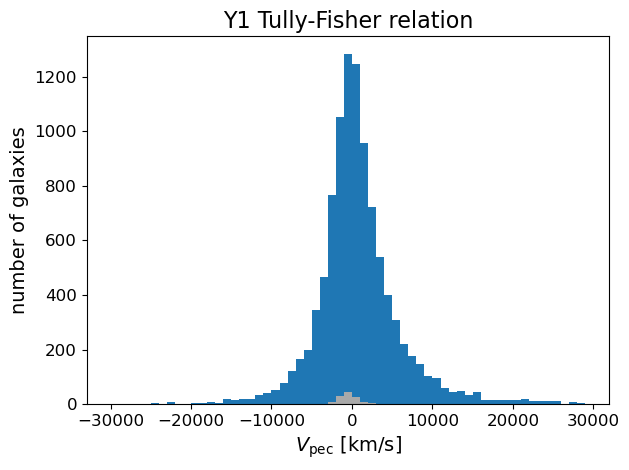

In [10]:
plt.figure(tight_layout=True)

# plt.subplot(121)
plt.title('Y1 Tully-Fisher relation', fontsize=16)
plt.hist(SGA_TF['V_PEC'][~dwarf_boolean], bins=v_bins)
plt.hist(SGA_TF['V_PEC'][dwarf_boolean], bins=v_bins, color='darkgray')
# plt.ylim(ymax=2000)
plt.xlabel(r'$V_\text{pec}$ [km/s]', fontsize=14)
plt.ylabel('number of galaxies', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.savefig('../../Figures/Y1/iron_PVs_hist.png', dpi=150, facecolor='none');

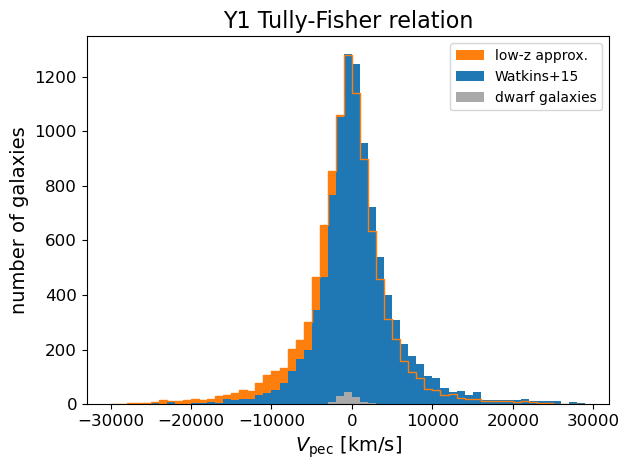

In [10]:
# Segev wants to see how these compare with the low-z approximated PVs
oldSGA_TF = Table.read('SGA_iron_jointTFR-varyV0-perpdwarf-fitH0_moduli_pec.fits')

# vbins_old = np.arange(-30000, 30000, 1000)

plt.figure(tight_layout=True)

# plt.subplot(121)
plt.title('Y1 Tully-Fisher relation', fontsize=16)
plt.hist(oldSGA_TF['V_PEC'], bins=v_bins, color='tab:orange', label='low-z approx.')
plt.hist(SGA_TF['V_PEC'][~dwarf_boolean], bins=v_bins, color='tab:blue', label='Watkins+15')
plt.hist(SGA_TF['V_PEC'][dwarf_boolean], bins=v_bins, color='darkgray', label='dwarf galaxies')
plt.hist(oldSGA_TF['V_PEC'], bins=v_bins, color='tab:orange', histtype='step')
# plt.ylim(ymax=2000)
# plt.yscale('log')
plt.legend()
plt.xlabel(r'$V_\text{pec}$ [km/s]', fontsize=14)
plt.ylabel('number of galaxies', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12);

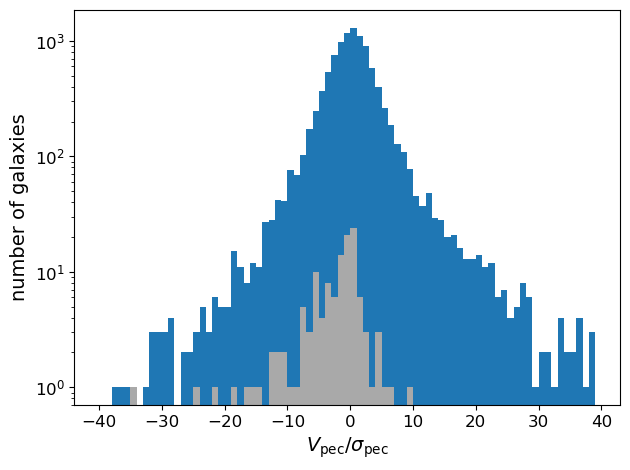

In [11]:
plt.figure(tight_layout=True)

plt.hist(SGA_TF['V_PEC'][~dwarf_boolean]/SGA_TF['VERR_PEC'][~dwarf_boolean], bins=np.arange(-40, 40, 1))
plt.hist(SGA_TF['V_PEC'][dwarf_boolean]/SGA_TF['VERR_PEC'][dwarf_boolean], bins=np.arange(-40, 40, 1), color='darkgray')

plt.yscale('log')

plt.xlabel(r'$V_{\rm pec}/\sigma_{\rm pec}$', fontsize=14)
plt.ylabel('number of galaxies', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12);

## Any residual correlation with $z$?

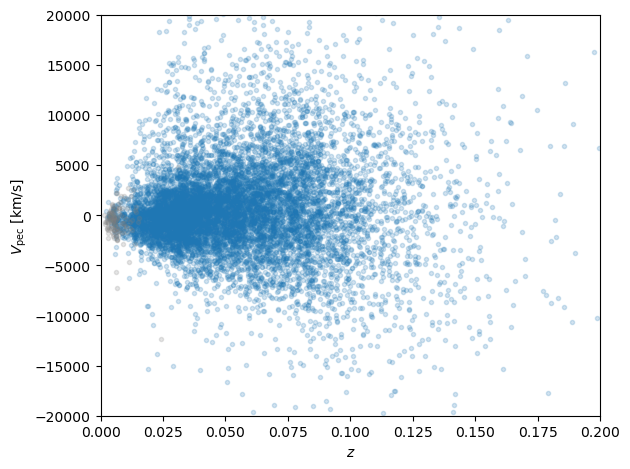

In [12]:
plt.figure(tight_layout=True)

plt.plot(SGA_TF['Z_DESI'][~dwarf_boolean], SGA_TF['V_PEC'][~dwarf_boolean], '.', alpha=0.2)
plt.plot(SGA_TF['Z_DESI'][dwarf_boolean], SGA_TF['V_PEC'][dwarf_boolean], '.', c='gray', alpha=0.2)

plt.xlim([0, 0.2])
plt.ylim([-20000, 20000])

plt.xlabel('$z$')
plt.ylabel(r'$V_\text{pec}$ [km/s]');

In [13]:
r_pearson_z = pearsonr(SGA_TF['Z_DESI'][~dwarf_boolean], SGA_TF['V_PEC'][~dwarf_boolean])
r_pearson_z

(0.06441014298072249, 8.585628992026854e-11)

# Any residual correlation with $b/a$?

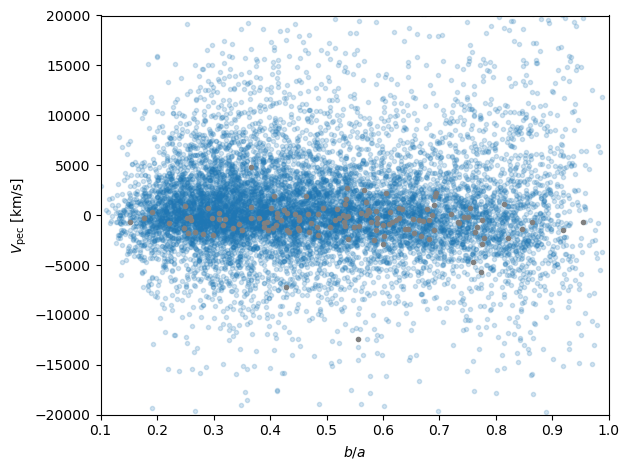

In [14]:
plt.figure(tight_layout=True)

plt.plot(SGA_TF['BA'][~dwarf_boolean], SGA_TF['V_PEC'][~dwarf_boolean], '.', alpha=0.2)
plt.plot(SGA_TF['BA'][dwarf_boolean], SGA_TF['V_PEC'][dwarf_boolean], '.', c='gray')

plt.xlim([0.1, 1])
plt.ylim([-20000, 20000])

plt.xlabel('$b/a$')
plt.ylabel(r'$V_\text{pec}$ [km/s]');

In [15]:
r_pearson = pearsonr(SGA_TF['BA'][~dwarf_boolean], SGA_TF['V_PEC'][~dwarf_boolean])
r_pearson

(0.05129706065178341, 2.3823101419341673e-07)

In [16]:
r_pearson_dwarf = pearsonr(SGA_TF['BA'][dwarf_boolean], SGA_TF['V_PEC'][dwarf_boolean])
r_pearson_dwarf

ValueError: array must not contain infs or NaNs